# 1.  Analyze the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


train_df = pd.read_csv('training.csv')
print ("training set has ", train_df.shape)
list_col_train = list(train_df)



training set has  (72983, 34)


In [2]:
# Check the linear dependence between feature1 and feature2
def plot_corr(feature1, feature2, df_name1, df_name2):
    plt.plot(df_name1[feature1], df_name1[feature2],'.')
    plt.plot(df_name2[feature1], df_name2[feature2],'.')
    plt.xlabel(feature1, fontsize=12)
    plt.ylabel(feature2, fontsize=12)
    plt.xticks(rotation=0)
def plot_multiple(select, df_name1, df_name2):
    nselect = len(select)
    nplot = nselect*(nselect-1)
    nplot_col = 4
    nplot_row = nplot/nplot_col+1
    #print (nplot_col, nplot_row)
    nsize = 4
    plt.figure(figsize = (nsize*nplot_col,nsize*nplot_row))
    count = 1
    for ind1 in range(len(select)):
        var1 = select[ind1]
        for ind2 in range(ind1+1,len(select)):
            var2 = select[ind2]
            #print (var1, var2)
            plt.subplot(nplot_row, nplot_col, count)
            count += 1
            plot_corr(var1, var2, df_name1, df_name2)

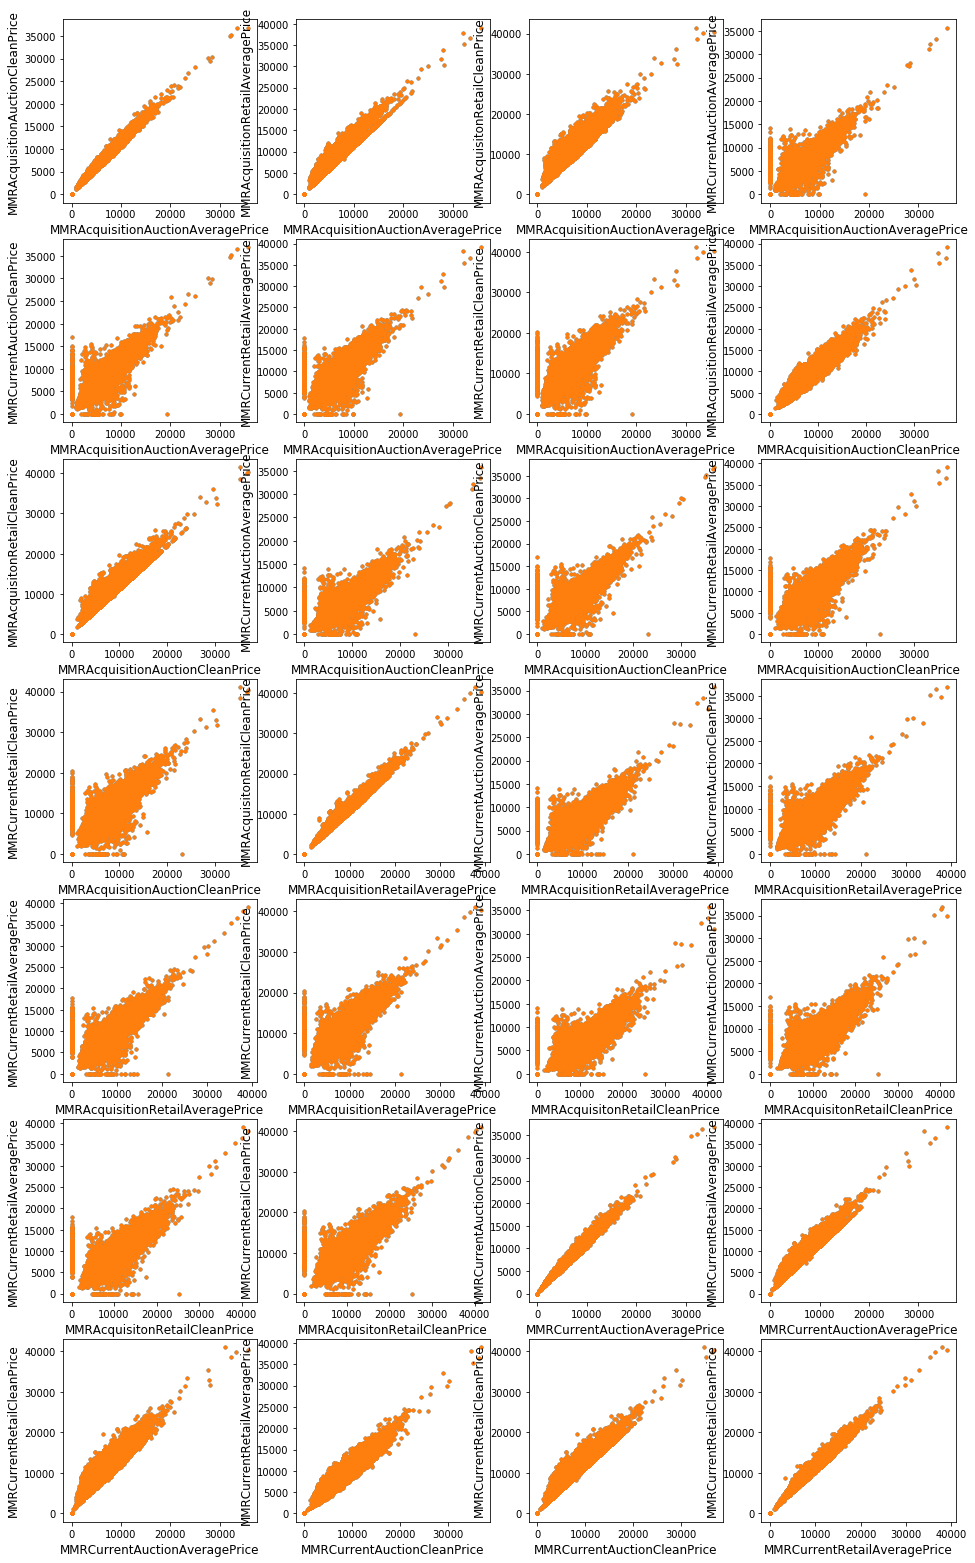

In [3]:
select = [
'MMRAcquisitionAuctionAveragePrice',\
'MMRAcquisitionAuctionCleanPrice',\
'MMRAcquisitionRetailAveragePrice',\
'MMRAcquisitonRetailCleanPrice',\
'MMRCurrentAuctionAveragePrice',\
'MMRCurrentAuctionCleanPrice',\
'MMRCurrentRetailAveragePrice',\
'MMRCurrentRetailCleanPrice']

plot_multiple(select, train_df, train_df)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/pham20/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/pham20/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version

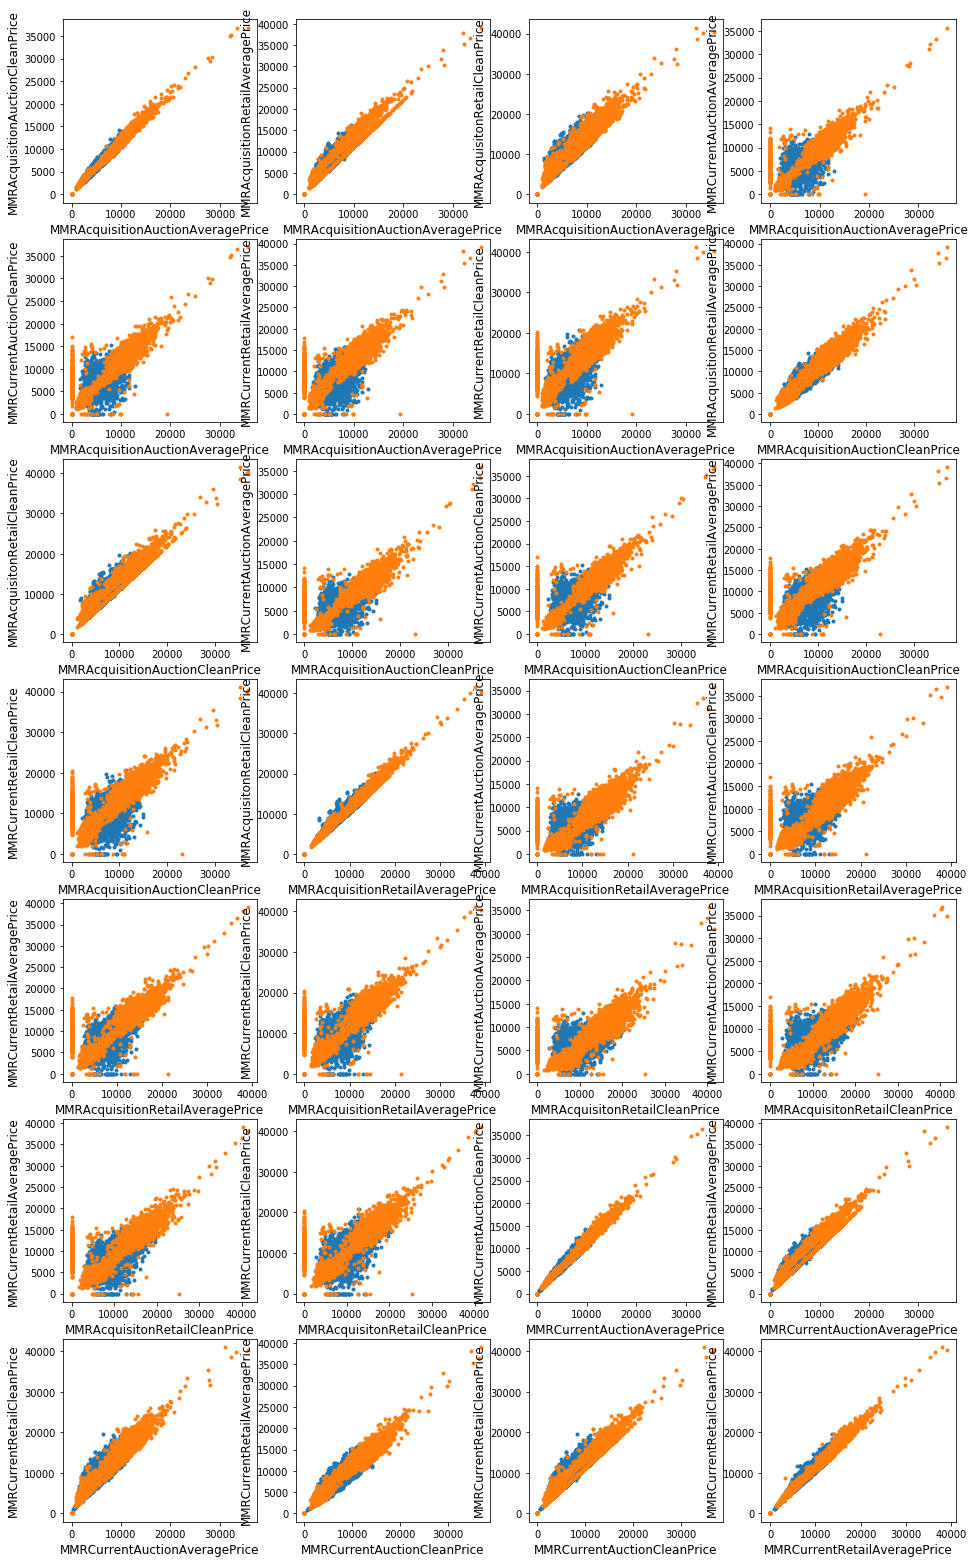

In [4]:
from sklearn.ensemble import IsolationForest
num_cols = list(train_df.select_dtypes(exclude=[np.object,np.datetime64]))

train = train_df[num_cols]
train.drop('RefId',axis = 1, inplace = True)
train.fillna(0,inplace=True)

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
NotOutliers = y_noano[y_noano['Top'] == 1].index.values
IsOutliers = y_noano[y_noano['Top'] == -1].index.values

plot_multiple(select, train_df.iloc[NotOutliers], train_df.iloc[IsOutliers])

In [5]:
train_df = train_df.iloc[NotOutliers]

In [6]:
test_df = pd.read_csv('test.csv')

print ("test set has ", test_df.shape)
ntest = test_df.shape[0]

print ("add one column to the test set")
print ("merge training set and test set to all_data")

Ytrain = train_df['IsBadBuy']
test_df['IsBadBuy'] = np.nan

# Put all data together so we can wrangle all the data at the same time
all_data = pd.concat([train_df, test_df], ignore_index=True)
all_data = all_data[list_col_train]
print ("all_data has ", all_data.shape)

can_drop = []

test set has  (48707, 33)
add one column to the test set
merge training set and test set to all_data
all_data has  (114391, 34)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  del sys.path[0]


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114391 entries, 0 to 114390
Data columns (total 34 columns):
RefId                                114391 non-null int64
IsBadBuy                             65684 non-null float64
PurchDate                            114391 non-null object
Auction                              114391 non-null object
VehYear                              114391 non-null int64
VehicleAge                           114391 non-null int64
Make                                 114391 non-null object
Model                                114391 non-null object
Trim                                 110659 non-null object
SubModel                             114381 non-null object
Color                                114382 non-null object
Transmission                         114382 non-null object
WheelTypeID                          109837 non-null float64
WheelType                            109833 non-null object
VehOdo                               114391 non-nul

## 1.1 Deal with duplicated data
There is no duplicated data. That is good.


In [8]:
all_data[all_data.duplicated(keep=False)].index

Int64Index([], dtype='int64')

## 1.2 Deal with correlated data
By just looking at the list of the data, we can see that some features seem to have correlations with each other, for example `WheelTypeID` vs. `WheelType`, `VehYear` vs. `VehicleAge`

In [9]:
feature_num = 'WheelTypeID'
feature_obj = 'WheelType'

feature_plot = [feature_num, feature_obj]
all_data[feature_plot].head()

obj_list = all_data[feature_obj].unique()
print (feature_obj, 'has those values:',  obj_list)
print ()
for obj in obj_list:
    unique_value = all_data.loc[all_data[feature_obj]==obj][feature_num].value_counts()
    print ('Statistical analysis for ', obj )
    print (unique_value)
    print ()

WheelType has those values: ['Alloy' 'Covers' nan 'Special']

Statistical analysis for  Alloy
1.0    57665
Name: WheelTypeID, dtype: int64

Statistical analysis for  Covers
2.0    51124
Name: WheelTypeID, dtype: int64

Statistical analysis for  nan
Series([], Name: WheelTypeID, dtype: int64)

Statistical analysis for  Special
3.0    1044
Name: WheelTypeID, dtype: int64



In [10]:
can_drop.append('WheelTypeID')

In [11]:
# Check the linear dependence between feature1 and feature2
def plot_corr(feature1, feature2):
    plt.plot(train_df[feature1], train_df[feature2],'.')
    plt.xlabel(feature1, fontsize=12)
    plt.ylabel(feature2, fontsize=12)
    plt.xticks(rotation=0)
def plot_multiple(select):
    nselect = len(select)
    nplot = nselect*(nselect-1)
    nplot_col = 4
    nplot_row = nplot/nplot_col+1
    #print (nplot_col, nplot_row)
    nsize = 4
    plt.figure(figsize = (nsize*nplot_col,nsize*nplot_row))
    count = 1
    for ind1 in range(len(select)):
        var1 = select[ind1]
        for ind2 in range(ind1+1,len(select)):
            var2 = select[ind2]
            #print (var1, var2)
            plt.subplot(nplot_row, nplot_col, count)
            count += 1
            plot_corr(var1, var2)

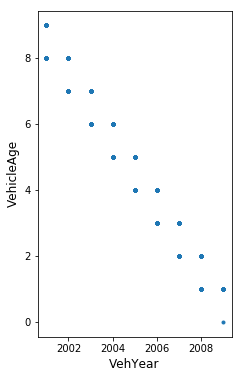

In [12]:
select = ['VehYear', 'VehicleAge']
plot_multiple(select)
can_drop.append('VehYear')


## 1.2 Deal with missing data

There are a lot of missing data. Fortunately, we see that some features (`Auction`, `Make`, `Model`, `VNST`) which have non-null values can be used with `groupby` to fill missing values.

This is a very easy way to deal with missing value:
all_isnull = all_data.columns[all_data.isnull().any()]
for col in all_isnull:
    try:
        all_data[col].fillna(all_data[col].mode()[0], inplace=True)
    except:
        all_data[col].fillna(all_data[col].median(), inplace=True)
all_data.info()

### 1.2.1 Category data

In [13]:
obj_cols = list(all_data.select_dtypes(include=[np.object]))
for col in obj_cols:
    print (col, ":  the number of unique data: ", len(all_data[col].unique()))
    if (len(all_data[col].unique()) < 20):
        print (all_data[col].unique())

PurchDate :  the number of unique data:  517
Auction :  the number of unique data:  3
['ADESA' 'OTHER' 'MANHEIM']
Make :  the number of unique data:  31
Model :  the number of unique data:  1077
Trim :  the number of unique data:  136
SubModel :  the number of unique data:  882
Color :  the number of unique data:  18
['RED' 'WHITE' 'MAROON' 'SILVER' 'BLACK' 'GOLD' 'GREY' 'BLUE' 'BEIGE'
 'ORANGE' 'GREEN' 'PURPLE' 'BROWN' 'YELLOW' 'NOT AVAIL' 'OTHER' nan 'PINK']
Transmission :  the number of unique data:  4
['AUTO' 'MANUAL' nan 'Manual']
WheelType :  the number of unique data:  4
['Alloy' 'Covers' nan 'Special']
Nationality :  the number of unique data:  5
['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER' nan]
Size :  the number of unique data:  13
['MEDIUM' 'LARGE TRUCK' 'COMPACT' 'LARGE' 'VAN' 'MEDIUM SUV' 'LARGE SUV'
 'SPECIALTY' 'SPORTS' 'CROSSOVER' 'SMALL SUV' 'SMALL TRUCK' nan]
TopThreeAmericanName :  the number of unique data:  5
['OTHER' 'CHRYSLER' 'FORD' 'GM' nan]
PRIMEUNIT :  

In [14]:
all_data[all_data['RefId'].duplicated(keep=False)].index

good_features = ['Auction', 'Make', 'Model', 'VNST']
null_features = [i for i in obj_cols if i not in good_features]

good_features_ID = good_features.copy()
good_features_ID.append('RefId')

print (good_features, good_features_ID)
print (null_features)

['Auction', 'Make', 'Model', 'VNST'] ['Auction', 'Make', 'Model', 'VNST', 'RefId']
['PurchDate', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART']


In [15]:
def find_most_feature(feature, unique_null, good_features):
    print ('feature=',feature)
    print ('unique_null=', unique_null)
    print ('good_features', good_features)
    tmp_data = all_data.copy()
    aa = tmp_data[feature].value_counts().argmax()
    most_feature = []
    most_feature.append(aa)
    for i in range(len(good_features)):
        tmp_data = tmp_data.loc[ (tmp_data[good_features[i]]== unique_null[i]) ]
        if ((tmp_data.shape[0] > 1) & (not tmp_data[feature].isnull().all()) ):
            aa = tmp_data[feature].value_counts().argmax()
            most_feature.append(aa)
            print ("selection of", good_features[i], tmp_data.shape[0], most_feature)
    print ()
    return [most_feature[-1]]
##

In [16]:
good_features_ID_null = good_features_ID.copy()
display_feature = 'SubModel'
good_features_ID_null.append(display_feature)
all_data[all_data[display_feature].isnull()][good_features_ID_null].head()

,Auction,Make,Model,VNST,RefId,SubModel
22159,MANHEIM,DODGE,STRATUS V6 2.7L V6 M,FL,24585,NaN
22170,MANHEIM,DODGE,STRATUS V6 2.7L V6 M,FL,24596,NaN
63354,ADESA,CHEVROLET,IMPALA 3.4L V6 SFI,TX,70466,NaN
63357,ADESA,PONTIAC,GRAND AM V6 3.4L V6,TX,70469,NaN
63366,ADESA,FORD,FREESTAR FWD V6 3.9L,TX,70482,NaN


In [17]:
ID_arr = all_data[all_data[display_feature].isnull()]['RefId'].values.tolist()
for ID in ID_arr[0:5]:
    ID_2_character = []
    tmp_data_ID = all_data.loc[all_data['RefId']==ID]
    for character in good_features:
        ID_2_character.append( tmp_data_ID[character].values[0] )
    print (ID_2_character)
    most_feature = find_most_feature(display_feature, ID_2_character, good_features)

['MANHEIM', 'DODGE', 'STRATUS V6 2.7L V6 M', 'FL']
feature= SubModel
unique_null= ['MANHEIM', 'DODGE', 'STRATUS V6 2.7L V6 M', 'FL']
good_features ['Auction', 'Make', 'Model', 'VNST']
selection of Auction 64976 ['4D SEDAN', '4D SEDAN']
selection of Make 10905 ['4D SEDAN', '4D SEDAN', '4D SEDAN']
selection of Model 991 ['4D SEDAN', '4D SEDAN', '4D SEDAN', '4D SEDAN SXT FFV']
selection of VNST 111 ['4D SEDAN', '4D SEDAN', '4D SEDAN', '4D SEDAN SXT FFV', '4D SEDAN SXT FFV']

['MANHEIM', 'DODGE', 'STRATUS V6 2.7L V6 M', 'FL']
feature= SubModel
unique_null= ['MANHEIM', 'DODGE', 'STRATUS V6 2.7L V6 M', 'FL']
good_features ['Auction', 'Make', 'Model', 'VNST']
selection of Auction 64976 ['4D SEDAN', '4D SEDAN']
selection of Make 10905 ['4D SEDAN', '4D SEDAN', '4D SEDAN']
selection of Model 991 ['4D SEDAN', '4D SEDAN', '4D SEDAN', '4D SEDAN SXT FFV']
selection of VNST 111 ['4D SEDAN', '4D SEDAN', '4D SEDAN', '4D SEDAN SXT FFV', '4D SEDAN SXT FFV']

['ADESA', 'CHEVROLET', 'IMPALA 3.4L V6 SFI', '

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


selection of Auction 25946 ['4D SEDAN', '4D SEDAN']
selection of Make 5940 ['4D SEDAN', '4D SEDAN', '4D SEDAN LS']
selection of Model 175 ['4D SEDAN', '4D SEDAN', '4D SEDAN LS', '4D SEDAN']
selection of VNST 29 ['4D SEDAN', '4D SEDAN', '4D SEDAN LS', '4D SEDAN', '4D SEDAN']

['ADESA', 'PONTIAC', 'GRAND AM V6 3.4L V6', 'TX']
feature= SubModel
unique_null= ['ADESA', 'PONTIAC', 'GRAND AM V6 3.4L V6', 'TX']
good_features ['Auction', 'Make', 'Model', 'VNST']
selection of Auction 25946 ['4D SEDAN', '4D SEDAN']
selection of Make 1884 ['4D SEDAN', '4D SEDAN', '4D SEDAN']
selection of Model 86 ['4D SEDAN', '4D SEDAN', '4D SEDAN', '4D SEDAN SE1']
selection of VNST 22 ['4D SEDAN', '4D SEDAN', '4D SEDAN', '4D SEDAN SE1', '4D SEDAN SE1']

['ADESA', 'FORD', 'FREESTAR FWD V6 3.9L', 'TX']
feature= SubModel
unique_null= ['ADESA', 'FORD', 'FREESTAR FWD V6 3.9L', 'TX']
good_features ['Auction', 'Make', 'Model', 'VNST']
selection of Auction 25946 ['4D SEDAN', '4D SEDAN']
selection of Make 4094 ['4D SEDAN'

In [18]:
good_features_loop = good_features.copy()
print ("doing fill null using groupby")
while all_data[null_features].isnull().values.any() & (len(good_features_loop) > 0):
    all_data[null_features] = all_data.groupby(good_features_loop).fillna(method='ffill')[null_features]
    good_features_loop.pop()

doing fill null using groupby


In [19]:
still_null = all_data[null_features].columns[all_data[null_features].isnull().any()].tolist()
for col in still_null:
    all_data[col].fillna("others",inplace = True)

In [20]:
for col in obj_cols:
    print (col, ":  the number of unique data: ", len(train_df[col].unique()))
    if (len(all_data[col].unique()) < 20):
        print (all_data[col].unique())

PurchDate :  the number of unique data:  515
Auction :  the number of unique data:  3
['ADESA' 'OTHER' 'MANHEIM']
Make :  the number of unique data:  31
Model :  the number of unique data:  946
Trim :  the number of unique data:  126
SubModel :  the number of unique data:  752
Color :  the number of unique data:  17
['RED' 'WHITE' 'MAROON' 'SILVER' 'BLACK' 'GOLD' 'GREY' 'BLUE' 'BEIGE'
 'ORANGE' 'GREEN' 'PURPLE' 'BROWN' 'YELLOW' 'NOT AVAIL' 'OTHER' 'PINK']
Transmission :  the number of unique data:  4
['AUTO' 'MANUAL' 'Manual']
WheelType :  the number of unique data:  4
['Alloy' 'Covers' 'Special']
Nationality :  the number of unique data:  5
['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER']
Size :  the number of unique data:  13
['MEDIUM' 'LARGE TRUCK' 'COMPACT' 'LARGE' 'VAN' 'MEDIUM SUV' 'LARGE SUV'
 'SPECIALTY' 'SPORTS' 'CROSSOVER' 'SMALL SUV' 'SMALL TRUCK']
TopThreeAmericanName :  the number of unique data:  5
['OTHER' 'CHRYSLER' 'FORD' 'GM']
PRIMEUNIT :  the number of unique data

In [21]:
all_data[all_data['RefId'].isin(ID_arr)][good_features_ID_null].head()

,Auction,Make,Model,VNST,RefId,SubModel
22159,MANHEIM,DODGE,STRATUS V6 2.7L V6 M,FL,24585,4D SEDAN SXT FFV
22170,MANHEIM,DODGE,STRATUS V6 2.7L V6 M,FL,24596,4D SEDAN SXT FFV
63354,ADESA,CHEVROLET,IMPALA 3.4L V6 SFI,TX,70466,4D SEDAN
63357,ADESA,PONTIAC,GRAND AM V6 3.4L V6,TX,70469,4D SEDAN SE1
63366,ADESA,FORD,FREESTAR FWD V6 3.9L,TX,70482,PASSENGER 3.9L SE


In [22]:
all_data[obj_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114391 entries, 0 to 114390
Data columns (total 15 columns):
PurchDate               114391 non-null object
Auction                 114391 non-null object
Make                    114391 non-null object
Model                   114391 non-null object
Trim                    114391 non-null object
SubModel                114391 non-null object
Color                   114391 non-null object
Transmission            114391 non-null object
WheelType               114391 non-null object
Nationality             114391 non-null object
Size                    114391 non-null object
TopThreeAmericanName    114391 non-null object
PRIMEUNIT               114391 non-null object
AUCGUART                114391 non-null object
VNST                    114391 non-null object
dtypes: object(15)
memory usage: 13.1+ MB


### 1.2.2 Deal with date

In [23]:
date_feature = 'PurchDate'
all_data[date_feature] = pd.to_datetime(all_data[date_feature])
all_data[date_feature].head()

0   2009-12-07
1   2009-12-07
2   2009-12-07
3   2009-12-07
4   2009-12-07
Name: PurchDate, dtype: datetime64[ns]

In [24]:
print ("data from:", all_data[date_feature].min(), " to:", all_data[date_feature].max() )
print ("which has total", all_data[date_feature].max() - all_data[date_feature].min())

data from: 2009-01-05 00:00:00  to: 2010-12-31 00:00:00
which has total 725 days 00:00:00


In [25]:
all_data['Year'] = all_data[date_feature].dt.year
all_data['Month'] = all_data[date_feature].dt.month
all_data['Day'] = all_data[date_feature].dt.day
all_data['Day_Name'] = all_data[date_feature].dt.weekday_name

The number of features is:  3
4 1


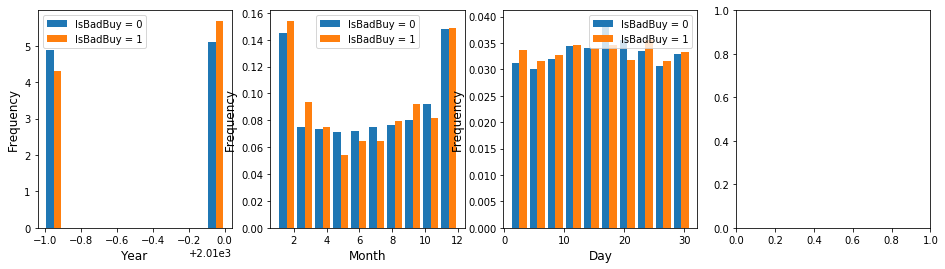

In [26]:
feature_plot = ['Year','Month','Day']

ncols = len(feature_plot)
print ("The number of features is: ", ncols)

nplot_col = 4
nplot_row = int(ncols/nplot_col+1)
print (nplot_col, nplot_row)

nsize = 4
fig, ax = plt.subplots(nplot_row, nplot_col, figsize=(nsize*nplot_col,nsize*nplot_row))
axes = ax.flatten()

count = 0
label = ['IsBadBuy = 0', 'IsBadBuy = 1']

for feature in feature_plot:
    data_hist = [all_data[all_data['IsBadBuy']==0][feature], all_data[all_data['IsBadBuy']==1][feature]]
    axes[count].hist(data_hist, density=True, label=label)
    axes[count].legend(prop={'size': 10})
    axes[count].set_xlabel(feature, fontsize=12)
    axes[count].set_ylabel('Frequency', fontsize=12)
    count += 1

Features `Year` and `Day` don't contribute much to the final results and they can be removed. For the month, we have to take the periodic function (`sin` and `cos`) to measure it.

In [27]:
all_data['sinMonth'] = np.sin(all_data['Month'] * 2.0 *np.pi/12)
all_data['cosMonth'] = np.cos(all_data['Month'] * 2.0 *np.pi/12)
all_data[['sinMonth','cosMonth','Month']].head()

can_drop.append('PurchDate')
can_drop.append('Year')
can_drop.append('Month')

Feature `Day_Name` contributes very much to the final results, so we will keep this feature using periodic function

nplot_col, nplot_row = 4 1


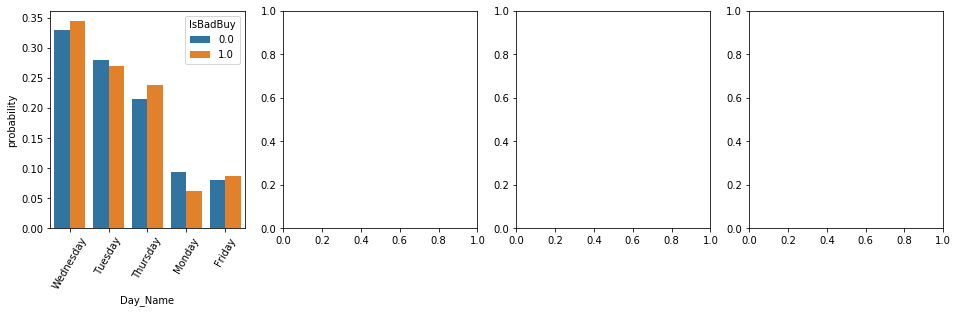

In [28]:
import seaborn as sns

feature_plot = ['Day_Name']

nplot = len(feature_plot)
nplot_col = 4
nplot_row = int(nplot/nplot_col) + 1
print ('nplot_col, nplot_row =', nplot_col,  nplot_row)
nsize = 4

count = 0

fig, ax = plt.subplots( nplot_row, nplot_col, figsize = (nsize*nplot_col, nsize*nplot_row))

tmp_name= 'probability'
hue = 'IsBadBuy'
for index_x in range(nplot_row):
    for index_y in range(nplot_col):
        if (count < nplot):
            feature = feature_plot[count]
            prop_df = (all_data[feature]
                       .groupby(all_data[hue])
                       .value_counts(normalize=True)
                       .rename(tmp_name)
                       .reset_index())
            try:
                g = sns.barplot(x=feature, y=tmp_name, hue=hue, data=prop_df, ax=ax[index_x][index_y],
                           order = all_data[all_data[hue]==0][feature].value_counts().iloc[:5].index)
                g.set_xticklabels(g.get_xticklabels(),rotation=60)
            except:
                g = sns.barplot(x=feature, y=tmp_name, hue=hue, data=prop_df, ax=ax[index_y],
                           order = all_data[all_data[hue]==0][feature].value_counts().iloc[:5].index)
                g.set_xticklabels(g.get_xticklabels(),rotation=60)
        count += 1

In [29]:
all_data['Day'] = all_data[date_feature] - all_data[date_feature].min()
all_data['Day'] = all_data['Day'].dt.days 
all_data['sinDay'] = np.sin(all_data['Day'] * 2.0 *np.pi/7)
all_data['cosDay'] = np.cos(all_data['Day'] * 2.0 *np.pi/7)

all_data[['sinDay','cosDay']].head()

can_drop.append('Day')
can_drop.append('Day_Name')

nplot_col, nplot_row = 4 4


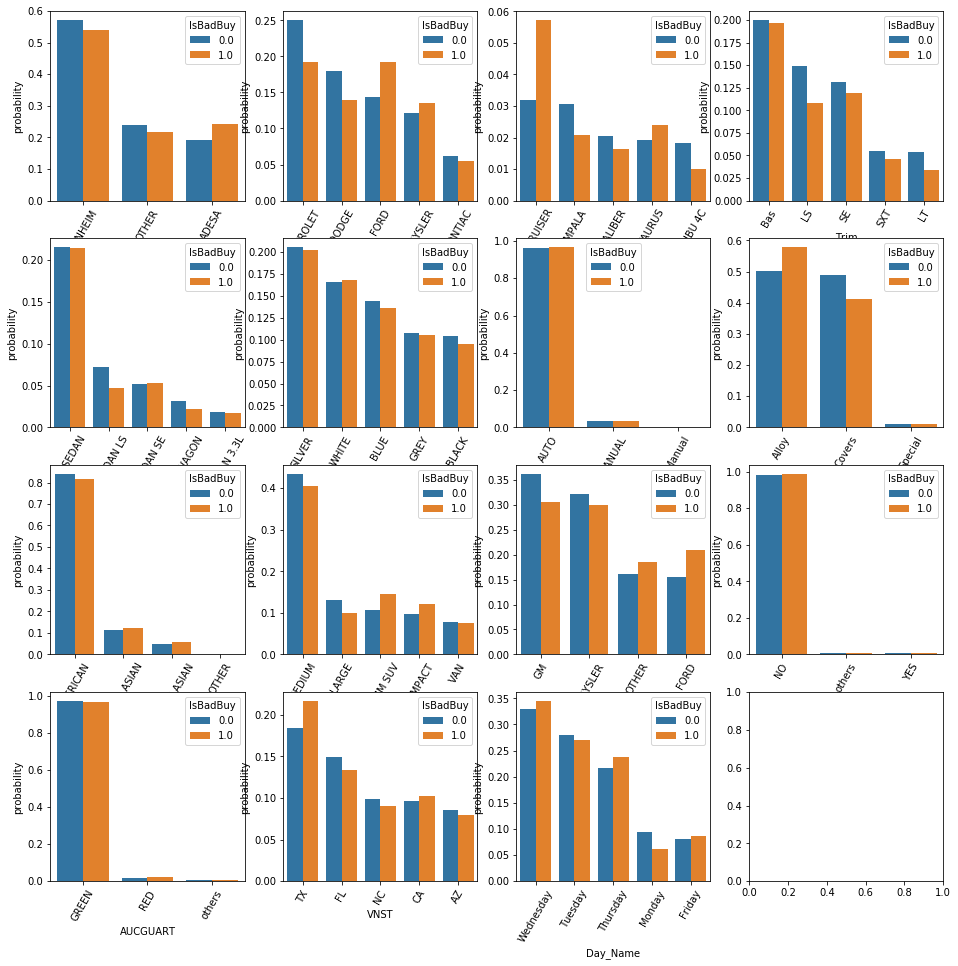

In [30]:
import seaborn as sns

obj_cols = list(all_data.select_dtypes(include=[np.object]))
feature_plot = obj_cols

nplot = len(feature_plot)
nplot_col = 4
nplot_row = int(nplot/nplot_col) + 1
print ('nplot_col, nplot_row =', nplot_col,  nplot_row)
nsize = 4

count = 0

fig, ax =plt.subplots( nplot_row, nplot_col, figsize = (nsize*nplot_col, nsize*nplot_row))

tmp_name= 'probability'
hue = 'IsBadBuy'
for index_x in range(nplot_row):
    for index_y in range(nplot_col):
        if (count < nplot):
            feature = feature_plot[count]
            prop_df = (all_data[feature]
                       .groupby(all_data[hue])
                       .value_counts(normalize=True)
                       .rename(tmp_name)
                       .reset_index())
            try:
                g = sns.barplot(x=feature, y=tmp_name, hue=hue, data=prop_df, ax=ax[index_x][index_y],
                           order = all_data[all_data[hue]==0][feature].value_counts().iloc[:5].index)
                g.set_xticklabels(g.get_xticklabels(),rotation=60)
            except:
                g = sns.barplot(x=feature, y=tmp_name, hue=hue, data=prop_df, ax=ax[index_y],
                           order = all_data[all_data[hue]==0][feature].value_counts().iloc[:5].index)
                g.set_xticklabels(g.get_xticklabels(),rotation=60)
        count += 1

### 1.2.3 Numeric data

In [31]:
num_cols = list(all_data.select_dtypes(exclude=[np.object,np.datetime64]))

print (good_features, good_features_ID)
null_features = num_cols.copy()
print (null_features)

['Auction', 'Make', 'Model', 'VNST'] ['Auction', 'Make', 'Model', 'VNST', 'RefId']
['RefId', 'IsBadBuy', 'VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Year', 'Month', 'Day', 'sinMonth', 'cosMonth', 'sinDay', 'cosDay']


In [32]:
good_features_ID_null = good_features_ID.copy()
display_feature = 'WheelTypeID'
print (display_feature)
good_features_ID_null.append(display_feature)
all_data[all_data[display_feature].isnull()][good_features_ID_null].head()

WheelTypeID


,Auction,Make,Model,VNST,RefId,WheelTypeID
37,ADESA,FORD,MUSTANG V6,FL,40,NaN
39,ADESA,NISSAN,SENTRA,FL,42,NaN
43,ADESA,NISSAN,XTERRA 2WD V6,FL,46,NaN
45,ADESA,TOYOTA,COROLLA,FL,48,NaN
47,ADESA,PONTIAC,G6 V6,FL,50,NaN


In [33]:
ID_arr = all_data[all_data[display_feature].isnull()]['RefId'].values.tolist()
for ID in ID_arr[0:5]:
    ID_2_character = []
    tmp_data_ID = all_data.loc[all_data['RefId']==ID]
    for character in good_features:
        ID_2_character.append( tmp_data_ID[character].values[0] )
    most_feature = find_most_feature(display_feature, ID_2_character, good_features)
    #train_df.loc[train_df['RefId']==ID, feature] = most_feature

feature= WheelTypeID
unique_null= ['ADESA', 'FORD', 'MUSTANG V6', 'FL']
good_features ['Auction', 'Make', 'Model', 'VNST']
selection of Auction 25946 [1.0, 1.0]
selection of Make 4094 [1.0, 1.0, 1.0]
selection of Model 148 [1.0, 1.0, 1.0, 1.0]
selection of VNST 25 [1.0, 1.0, 1.0, 1.0, 1.0]

feature= WheelTypeID
unique_null= ['ADESA', 'NISSAN', 'SENTRA', 'FL']
good_features ['Auction', 'Make', 'Model', 'VNST']
selection of Auction 25946 [1.0, 1.0]
selection of Make 746 [1.0, 1.0, 1.0]
selection of Model 109 [1.0, 1.0, 1.0, 2.0]
selection of VNST 14 [1.0, 1.0, 1.0, 2.0, 2.0]

feature= WheelTypeID
unique_null= ['ADESA', 'NISSAN', 'XTERRA 2WD V6', 'FL']
good_features ['Auction', 'Make', 'Model', 'VNST']
selection of Auction 25946 [1.0, 1.0]
selection of Make 746 [1.0, 1.0, 1.0]
selection of Model 43 [1.0, 1.0, 1.0, 1.0]
selection of VNST 4 [1.0, 1.0, 1.0, 1.0, 1.0]

feature= WheelTypeID
unique_null= ['ADESA', 'TOYOTA', 'COROLLA', 'FL']
good_features ['Auction', 'Make', 'Model', 'VNST']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


selection of Auction 25946 [1.0, 1.0]
selection of Make 410 [1.0, 1.0, 2.0]
selection of Model 74 [1.0, 1.0, 2.0, 2.0]
selection of VNST 20 [1.0, 1.0, 2.0, 2.0, 2.0]

feature= WheelTypeID
unique_null= ['ADESA', 'PONTIAC', 'G6 V6', 'FL']
good_features ['Auction', 'Make', 'Model', 'VNST']
selection of Auction 25946 [1.0, 1.0]
selection of Make 1884 [1.0, 1.0, 1.0]
selection of Model 276 [1.0, 1.0, 1.0, 1.0]
selection of VNST 19 [1.0, 1.0, 1.0, 1.0, 1.0]



In [34]:
good_features_loop = good_features.copy()
print ("doing fill null using groupby")
while all_data[null_features].isnull().values.any() & (len(good_features_loop) > 0):
    all_data[null_features] = all_data.groupby(good_features_loop).fillna(method='ffill')[null_features]
    good_features_loop.pop()

doing fill null using groupby


In [35]:
all_data[all_data['RefId'].isin(ID_arr)][good_features_ID_null].head()

,Auction,Make,Model,VNST,RefId,WheelTypeID
37,ADESA,FORD,MUSTANG V6,FL,40,1.0
39,ADESA,NISSAN,SENTRA,FL,42,2.0
43,ADESA,NISSAN,XTERRA 2WD V6,FL,46,2.0
45,ADESA,TOYOTA,COROLLA,FL,48,1.0
47,ADESA,PONTIAC,G6 V6,FL,50,1.0


The number of features is:  26
4 7


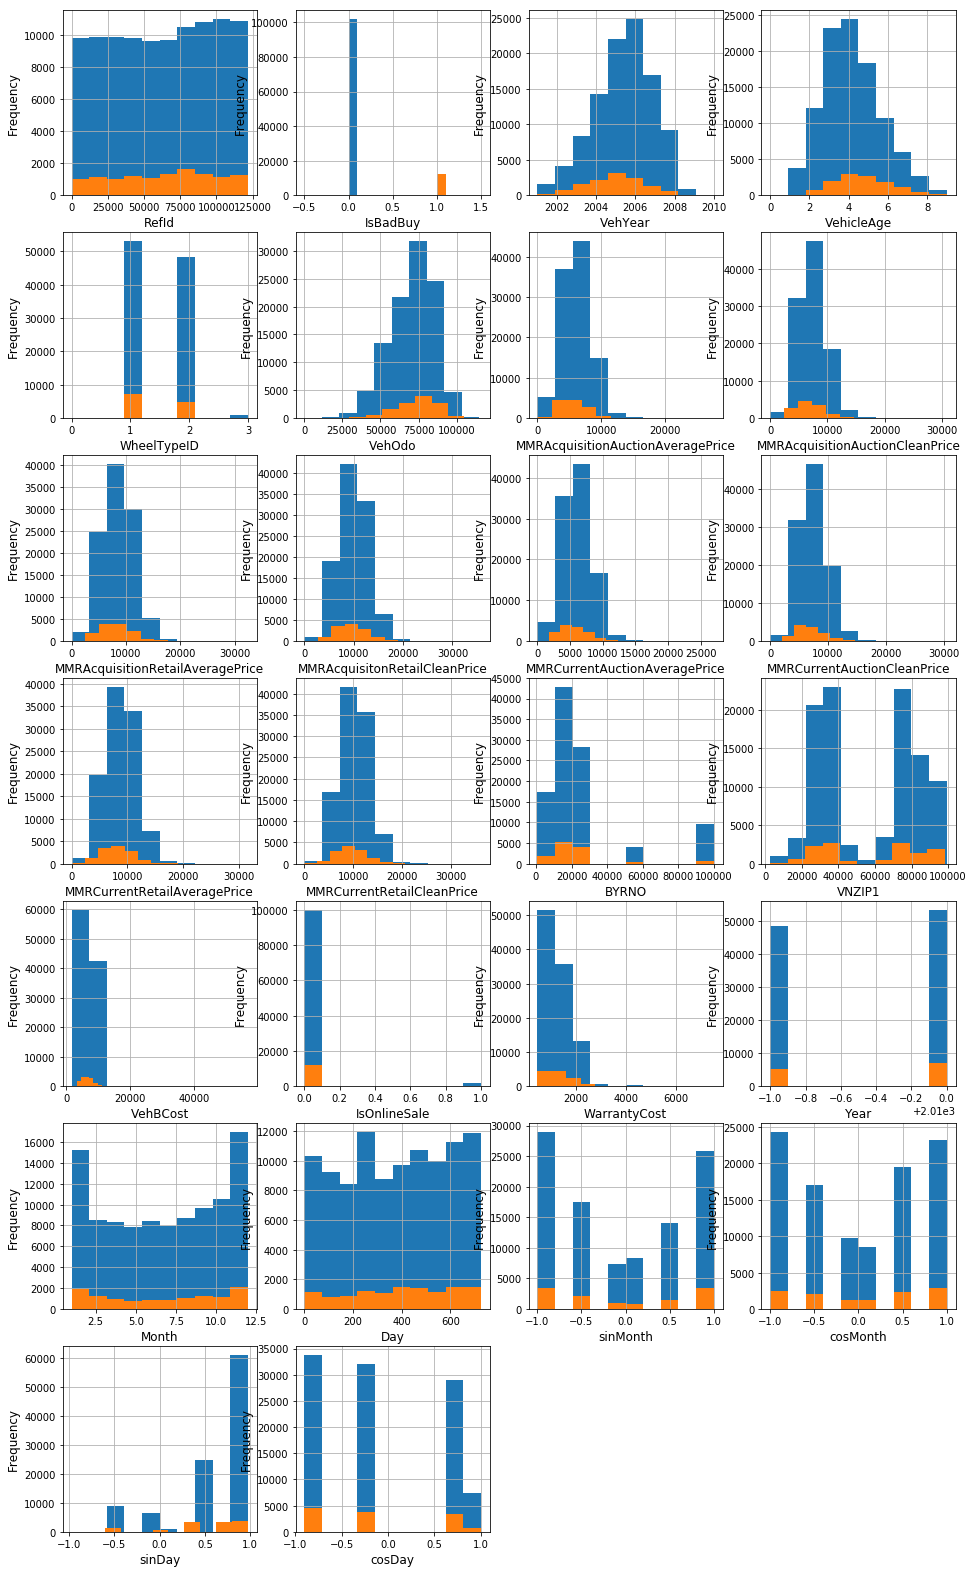

In [36]:
num_cols = list(all_data.select_dtypes(exclude=[np.object,np.datetime64]))
feature_plot = num_cols
ncols = len(feature_plot)
print ("The number of features is: ", ncols)

nplot_col = 4
nplot_row = int(ncols/nplot_col+1)
print (nplot_col, nplot_row)

nsize = 4
plt.figure(figsize = (nsize*nplot_col,nsize*nplot_row))

count = 1

for feature in feature_plot:
    plt.subplot(nplot_row, nplot_col, count)
    count += 1
    all_data[all_data['IsBadBuy']==0][feature].hist()
    all_data[all_data['IsBadBuy']==1][feature].hist()
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.xticks(rotation=0)
plt.show()

The number of features is:  26
4 7


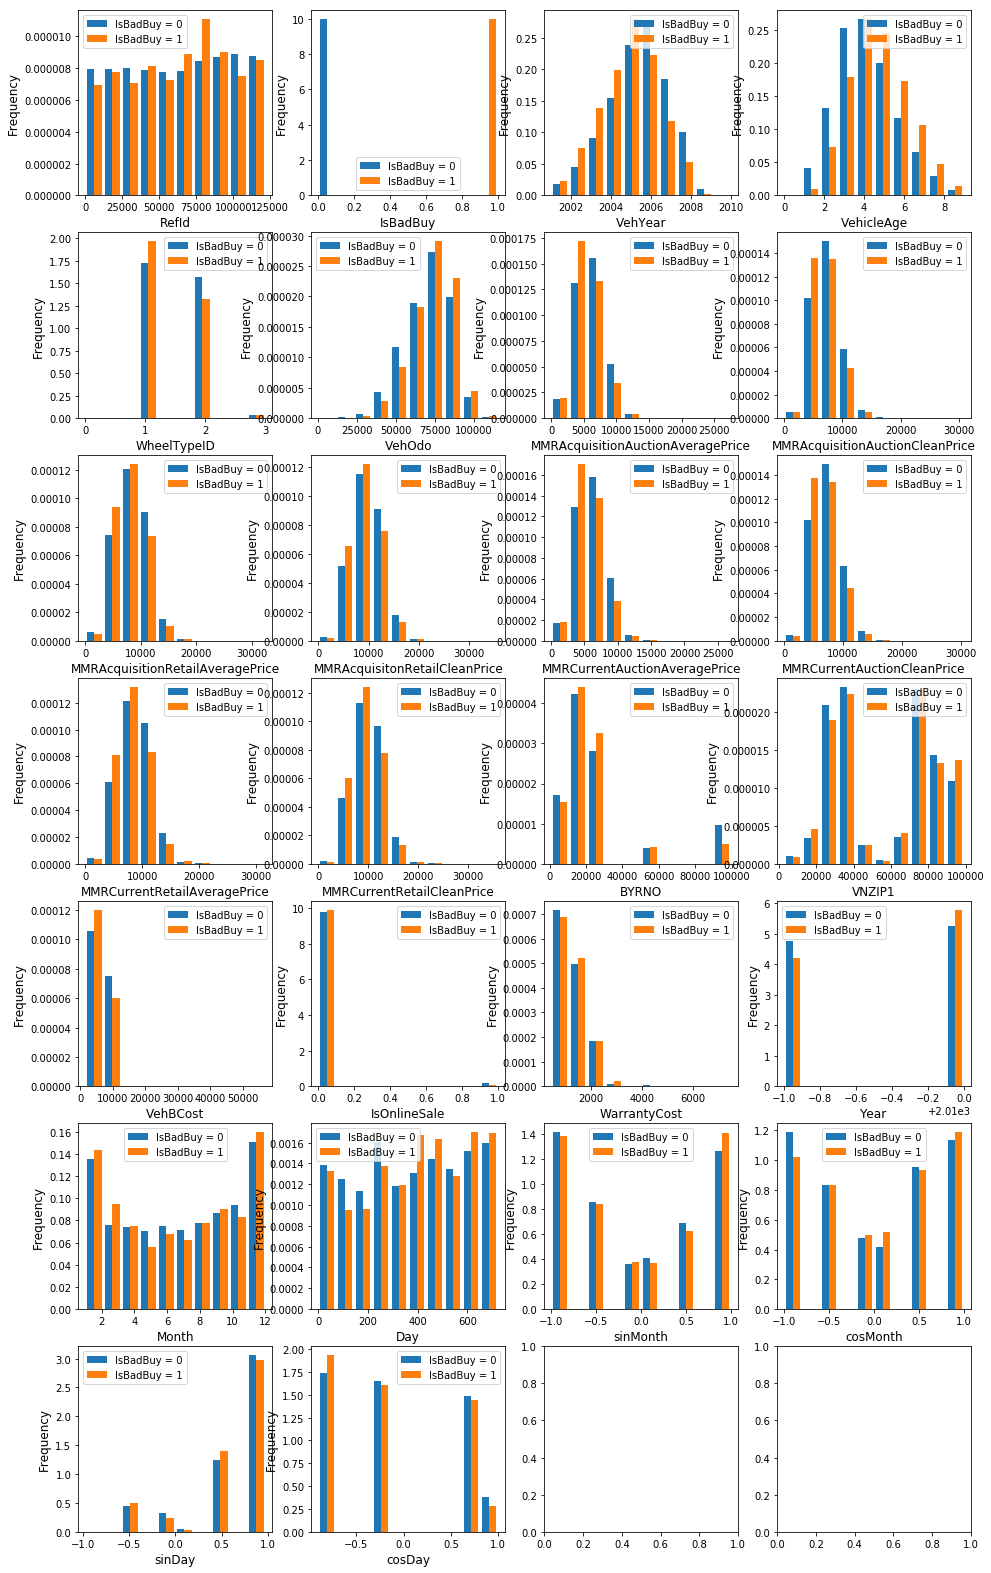

In [37]:
num_cols = list(all_data.select_dtypes(exclude=[np.object,np.datetime64]))
feature_plot = num_cols

ncols = len(feature_plot)
print ("The number of features is: ", ncols)

nplot_col = 4
nplot_row = int(ncols/nplot_col+1)
print (nplot_col, nplot_row)

nsize = 4
fig, ax = plt.subplots(nplot_row, nplot_col, figsize=(nsize*nplot_col,nsize*nplot_row))
axes = ax.flatten()

count = 0
label = ['IsBadBuy = 0', 'IsBadBuy = 1']

for feature in feature_plot:
    data_hist = [all_data[all_data['IsBadBuy']==0][feature], all_data[all_data['IsBadBuy']==1][feature]]
    axes[count].hist(data_hist, density=True, label=label)
    axes[count].legend(prop={'size': 10})
    axes[count].set_xlabel(feature, fontsize=12)
    axes[count].set_ylabel('Frequency', fontsize=12)
    count += 1

### 1.2.2 Correlated data

In [38]:
all_data['PurchDate'].head()

0   2009-12-07
1   2009-12-07
2   2009-12-07
3   2009-12-07
4   2009-12-07
Name: PurchDate, dtype: datetime64[ns]

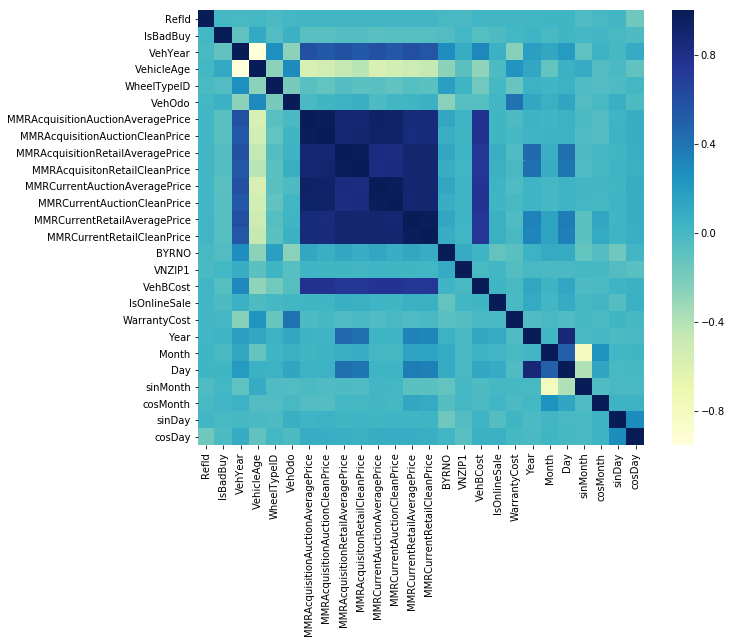

In [39]:
import seaborn as sns

corr = all_data[num_cols].corr()

plt.figure(figsize = (10,8))

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="YlGnBu",annot=False)

plt.show()

In [40]:
# Check the linear dependence between feature1 and feature2
def plot_corr(feature1, feature2):
    plt.plot(train_df[feature1], train_df[feature2],'.')
    plt.xlabel(feature1, fontsize=12)
    plt.ylabel(feature2, fontsize=12)
    plt.xticks(rotation=0)
def plot_multiple(select):
    nselect = len(select)
    nplot = nselect*(nselect-1)
    nplot_col = 4
    nplot_row = nplot/nplot_col+1
    #print (nplot_col, nplot_row)
    nsize = 4
    plt.figure(figsize = (nsize*nplot_col,nsize*nplot_row))
    count = 1
    for ind1 in range(len(select)):
        var1 = select[ind1]
        for ind2 in range(ind1+1,len(select)):
            var2 = select[ind2]
            #print (var1, var2)
            plt.subplot(nplot_row, nplot_col, count)
            count += 1
            plot_corr(var1, var2)

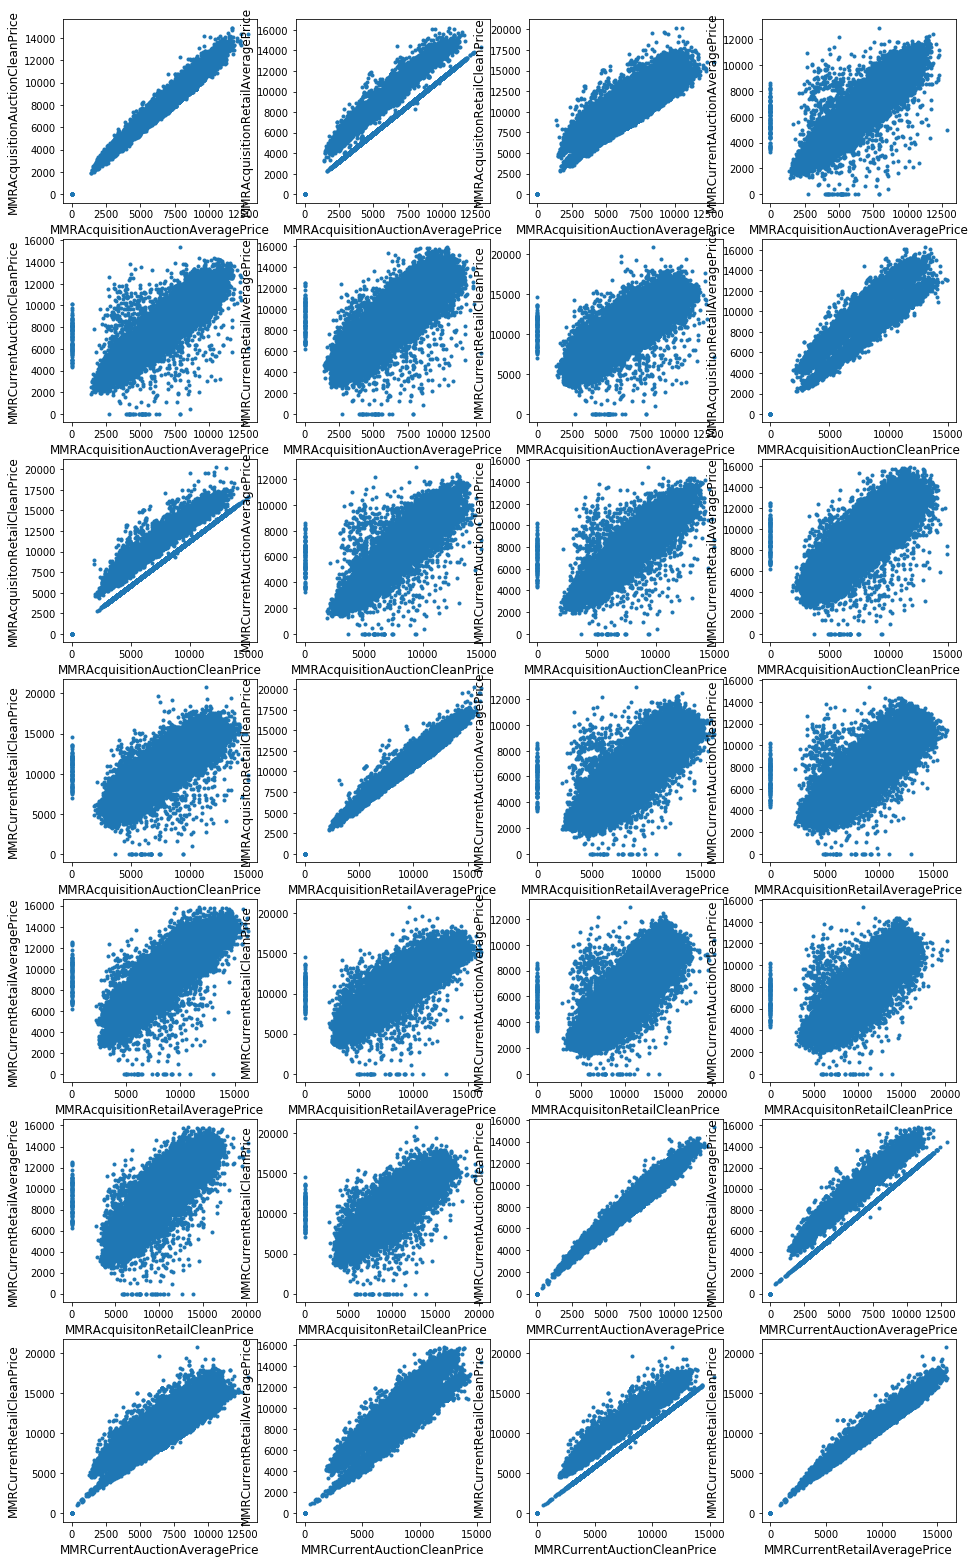

In [41]:
select = [
'MMRAcquisitionAuctionAveragePrice',\
'MMRAcquisitionAuctionCleanPrice',\
'MMRAcquisitionRetailAveragePrice',\
'MMRAcquisitonRetailCleanPrice',\
'MMRCurrentAuctionAveragePrice',\
'MMRCurrentAuctionCleanPrice',\
'MMRCurrentRetailAveragePrice',\
'MMRCurrentRetailCleanPrice']

plot_multiple(select)

In [42]:
can_drop.append('MMRAcquisitionAuctionAveragePrice')
can_drop.append('MMRAcquisitionRetailAveragePrice')
can_drop.append('MMRCurrentAuctionAveragePrice')
can_drop.append('MMRCurrentRetailAveragePrice')

###  Drop the unimportant features

`RefId` has nothing to do but only the ID number that can be removed. `IsBadBuy` is the result we need to predict

In [43]:
all_data2 = all_data.copy()
all_data2.drop(labels='AUCGUART', axis='columns', inplace=True)
all_data2.drop(labels='PRIMEUNIT', axis='columns', inplace=True)

for idrop in can_drop:
    all_data2.drop(labels=idrop, axis='columns', inplace=True)
all_data2.drop(labels='RefId', axis='columns', inplace=True)
all_data2.drop(labels='IsBadBuy', axis='columns', inplace=True)

In [44]:
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114391 entries, 0 to 114390
Data columns (total 27 columns):
Auction                            114391 non-null object
VehicleAge                         114391 non-null int64
Make                               114391 non-null object
Model                              114391 non-null object
Trim                               114391 non-null object
SubModel                           114391 non-null object
Color                              114391 non-null object
Transmission                       114391 non-null object
WheelType                          114391 non-null object
VehOdo                             114391 non-null int64
Nationality                        114391 non-null object
Size                               114391 non-null object
TopThreeAmericanName               114391 non-null object
MMRAcquisitionAuctionCleanPrice    114391 non-null float64
MMRAcquisitonRetailCleanPrice      114391 non-null float64
MMRCurrentAuctionCl

### Deal with category variable


In [45]:
import category_encoders as ce

import numpy as np

nonList = list(all_data2.select_dtypes(include=[np.object]))
print (nonList)

all_data3 = all_data2.copy()

for this_label in nonList:
    
    encoder = ce.BinaryEncoder(cols=[this_label])
    
    all_data3 = encoder.fit_transform(all_data3)    
    
    print (this_label, len(all_data2[this_label].unique()))
    if (len(all_data2[this_label].unique()) < 40):
        print (all_data2[this_label].unique())
    

['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']
Auction 3
['ADESA' 'OTHER' 'MANHEIM']
Make 31
['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI'
 'JEEP' 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU' 'MINI'
 'LINCOLN' 'CADILLAC' 'INFINITI' 'LEXUS' 'ACURA' 'SUBARU' 'VOLVO'
 'TOYOTA SCION']
Model 1077
Trim 135
SubModel 881
Color 17
['RED' 'WHITE' 'MAROON' 'SILVER' 'BLACK' 'GOLD' 'GREY' 'BLUE' 'BEIGE'
 'ORANGE' 'GREEN' 'PURPLE' 'BROWN' 'YELLOW' 'NOT AVAIL' 'OTHER' 'PINK']
Transmission 3
['AUTO' 'MANUAL' 'Manual']
WheelType 3
['Alloy' 'Covers' 'Special']
Nationality 4
['OTHER ASIAN' 'AMERICAN' 'TOP LINE ASIAN' 'OTHER']
Size 12
['MEDIUM' 'LARGE TRUCK' 'COMPACT' 'LARGE' 'VAN' 'MEDIUM SUV' 'LARGE SUV'
 'SPECIALTY' 'SPORTS' 'CROSSOVER' 'SMALL SUV' 'SMALL TRUCK']
TopThreeAmericanName 4
['OTHER' 'CHRYSLER'

###  Diving in (machine learning)

<p>Now that the data has been cleaned, we can try to find a model that works well for making our predictions. We'll also load in some classifiers which we will compare.</p>

In [46]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

Xtrain = all_data3.head(len(Ytrain))

RFC = RandomForestClassifier()
Ada = AdaBoostClassifier()
KNN = KNeighborsClassifier()
classifiers = [RFC, Ada, KNN]
clf_names = ['Random Forest', 'AdaBoost', 'K Nearest Neighbors']

<p>For this analysis, we'll only be comparing across three classifiers: Random Forest, AdaBoost, and K Nearest Neighbors. For more information on other potential (or more complicated) classifiers I invite you to check out the other kernels posted by those who top the leaderboards for this competition.</p>

<p>For each of these classifiers, we'll want to make sure we create the models with the optimal parameters. We can do this with a Grid Search. We define the set of parameters we want to scan for each type of classifier, and then run our grid searches.</p>

In [47]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Use kfold as our cross validation
kfold = StratifiedKFold(n_splits=4)

# Set grid search parameter settings
rfc_param_grid = {'max_depth': [None],
                 'max_features': [1],
                 'min_samples_split': [2],
                 'min_samples_leaf': [1],
                 'bootstrap': [False],
                 'n_estimators': [100],
                 'criterion': ['gini']}
ada_param_grid = {'n_estimators': [20],
                 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
knn_param_grid = {'n_neighbors': [5],
                  'weights': ['uniform', 'distance'],
                 'leaf_size': [5]}
param_grids = [rfc_param_grid, ada_param_grid, knn_param_grid]

# Perform grid searches to get estimators with the optimal settings
grid_searches = []
for i in range(len(classifiers)):
    grid_searches.append(GridSearchCV(estimator=classifiers[i], param_grid=param_grids[i], 
                                      n_jobs=4, cv=kfold, verbose=1))

<p>We'll now want to see the training scores for each of our models and determine which one works the best. We'll fit each model to our training set and add the best scores from each to a list.</p>

In [48]:
# Train the models
best_scores = []
for i in range(len(grid_searches)):
    print (grid_searches[i])
    grid_searches[i].fit(Xtrain, Ytrain)
    best_scores.append(grid_searches[i].best_score_)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [None], 'max_features': [1], 'min_samples_split': [2], 'min_samples_leaf': [1], 'bootstrap': [False], 'n_estimators': [100], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)
Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   10.8s remaining:   10.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   10.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)
Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    9.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_neighbors': [5], 'weights': ['uniform', 'distance'], 'leaf_size': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)
Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:   24.6s finished


In [49]:
print (grid_searches[1])

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)


<p>Let's see the best scores for each classifier.</p>

In [50]:
# Best scores
for i in range(len(best_scores)):
    print(clf_names[i] + ": " + str(best_scores[i]))

Random Forest: 0.8926831496254796
AdaBoost: 0.8957889288106693
K Nearest Neighbors: 0.8784940015833385


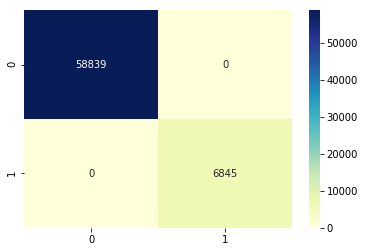

In [51]:
from sklearn.metrics import confusion_matrix

predictions = grid_searches[0].predict(Xtrain)
g = sns.heatmap(confusion_matrix(Ytrain, predictions),fmt="d",cmap="YlGnBu",annot=True)
plt.show()

<p>Based on these training scores, it makes the most sense to use the Random Forest Classifier to make the predictions. We'll predict on the test set, and then write the predictions to a csv file for submission.</p>

In [52]:
# Make predictions
Xtest = all_data3.tail(ntest)
#Xtest = test_df.drop(columns='RefId', axis='columns')
predictions = grid_searches[0].predict(Xtest)

# Write predictions to output csv
pred_df = pd.DataFrame({'RefId': test_df['RefId'],
                        'IsBadBuy': predictions})
pred_df.to_csv('predictions.csv', index=False)

print("Done writing to csv")

Done writing to csv
